# The purpose of this script is to analyze the 2021 NeurIPS papers and rank them by review scores

In [12]:
import pickle
import matplotlib.pyplot as plt
import pprint
import numpy as np
import pandas as pd
import seaborn as sns

### Load data

In [2]:
with open('data/2021_neurips_processed_paper_data.pkl' ,'rb') as file:
    paper_data = pickle.load(file)

paper_by_name_dict = {}
for paper in paper_data:
    
    if paper['title'] in paper_by_name_dict:
        paper_by_name_dict[paper['title']]['review_2'] = paper
    else:
        paper_by_name_dict[paper['title']] = paper

### Compute the number of papers with code

In [3]:
papers_with_code = 0
for paper_name in paper_by_name_dict:
    paper = paper_by_name_dict[paper_name]
    
    if paper['code'] is not None:
        papers_with_code += 1
        
print('%d papers have code out of %d total papers' % (papers_with_code, len(paper_by_name_dict)))
print('%.02f%% of papers come with code' % (100*papers_with_code/len(paper_by_name_dict)) )

1507 papers have code out of 2469 total papers
61.04% of papers come with code


### Compute the occurrence of keywords over the set of papers

In [4]:
keyword_dict = {}
for paper_name in paper_by_name_dict:
    paper = paper_by_name_dict[paper_name]
    for keyword in paper['keywords']:
        if keyword.lower() not in keyword_dict:
            keyword_dict[keyword.lower()] = 0
        keyword_dict[keyword.lower()] += 1
    

sorted_keyword_occurrences = {k: v for k, v in sorted(keyword_dict.items(), key=lambda item: -item[1])}
print('number of distinct keywords: %d' % (len(sorted_keyword_occurrences)))
for keyword in sorted_keyword_occurrences:
    print(sorted_keyword_occurrences[keyword], keyword)
    

number of distinct keywords: 5384
183 reinforcement learning
130 deep learning
59 self-supervised learning
56 representation learning
54 generalization
54 transformer
53 graph neural networks
50 robustness
49 meta-learning
47 online learning
44 differential privacy
41 optimization
41 computer vision
40 neural networks
39 federated learning
38 fairness
38 adversarial robustness
37 generative models
37 transfer learning
37 contrastive learning
35 causal inference
34 convex optimization
34 variational inference
33 transformers
31 learning theory
30 unsupervised learning
30 gaussian processes
29 interpretability
29 machine learning
29 deep reinforcement learning
28 graph neural network
26 statistical learning theory
25 domain adaptation
25 few-shot learning
24 exploration
23 active learning
23 sparsity
23 continual learning
22 attention
22 theory
22 calibration
21 stochastic optimization
21 multi-armed bandits
20 neuroscience
20 regularization
20 optimal transport
20 clustering
19 distribu

1 novel category discovery
1 decomposable submodular function minimization
1 sparse graphs
1 graph cuts
1 speech analysis
1 information perturbation
1 bellman-ford algorithm
1 invariant risk minimization
1 group representation
1 vqa-cp
1 perceptiveness
1 visual dialog
1 socialiq
1 relu
1 human
1 pose
1 shape
1 people
1 mesh
1 semantic edge detection
1 propagation network
1 self-supervised visual representation learning
1 neural implicit function
1 octree
1 3d representation
1 multi-task reinforcement learning
1 subgaussian
1 point cloud detection
1 bayesian active learning
1 gaussian process classification
1 expected error reduction
1 query synthesis
1 feature-level augmentation
1 model matching
1 unsupervised pretraining
1 neural models
1 causal identification
1 causal estimation
1 representational similarity analysis
1 neural representations
1 shape analysis
1 metric space
1 risk-aware bandits
1 mean-covariance metric
1 online action detection
1 action and behavior recognition
1 vide

1 cerebellar function
1 decoupled neural interfaces
1 locking problem
1 temporal credit assignment
1 bayesian test
1 stein's methods
1 representation learning on textual graph
1 text mining
1 relevance modeling
1 superset learning
1 credal sets
1 label relaxation
1 pseudo-labeling
1 temporal logic
1 synthesis
1 circuits
1 diffeomorphisms
1 network architecture
1 extensive-form game
1 equilibrium refinement
1 deep model acceleration
1 trajectory prediction
1 semantic correspondence
1 cost aggregation
1 visual correspondence
1 tractable probabilistic models
1 parameter regularization
1 weisfeiler-lehman
1 visual token
1 problem-dependent analysis
1 representation selection
1 power sum functional
1 minimax estimation
1 interactive privacy mechanism
1 non-interactive privacy mechanism
1 plug-in estimator
1 threshold estimation
1 tabular datasets
1 regularization cocktails
1 combined algorithm selection and hyperparameter optimization.
1 public goods games
1 network games
1 multi-agent syst

In [113]:
sorted_keyword_occurrences['humans']

1

### Do the following: 1) filter papers to those containing specific keywords in their abstract, 2) rank papers based on average review scores

In [5]:
search_keywords = ['']

filtered_papers = []
venue_count_dict = {}
for paper_name in paper_by_name_dict:
    paper = paper_by_name_dict[paper_name]
    abstract = paper['abstract'].lower()
    
    found_search_keywords = True
    for search_keyword in search_keywords:
        if search_keyword not in abstract:
            found_search_keywords = False
            
    if found_search_keywords == False:
        print('bad')
        continue
    
    ratings = []
    for rating in paper['rating_list']:
        ratings.append(float(rating.split(':')[0]))
    if len(ratings) == 0:
        ratings.append(-1)
    
    if paper['venue'] not in venue_count_dict:
        venue_count_dict[paper['venue']] = 0
    venue_count_dict[paper['venue']] += 1
    
    filtered_papers.append( (np.mean(ratings), paper))
    
sorted_filtered_papers = sorted(filtered_papers, key=lambda paper: paper[0], reverse=True)
average_ratings = [x[0] for x in filtered_papers]




paper_id = 0
for average_rating, paper in sorted_filtered_papers:
    paper_id += 1
    print('paper rank: %d' % (paper_id))
    print('Average Rating:', average_rating)
    print('Title:', paper['title'])
    print('Keywords:', paper['keywords'])
    print('Code:', paper['code'])
    print('PDF URL:', paper['pdf'])
    print('Review URL:', paper['url'])
    print('Venue:',paper['venue'])
    print('Abstract:',paper['abstract'])
    
    
    
    print('\n\n\n')
    
    if paper_id > 30:
        break
    


paper rank: 1
Average Rating: 8.75
Title: Near-Optimal No-Regret Learning in General Games
Keywords: ['No-regret learning', 'coarse correlated equilibrium', 'Optimistic Hedge']
Code: None
PDF URL: https://openreview.net/pdf/18b08517ad90722c063baf7209c8379b6838dbd6.pdf
Review URL: https://openreview.net/forum?id=cVwc7IHWEWi
Venue: NeurIPS 2021 Oral
Abstract: We show that Optimistic Hedge -- a common variant of multiplicative-weights-updates with recency bias -- attains ${\rm poly}(\log T)$ regret in multi-player general-sum games. In particular, when every player of the game uses Optimistic Hedge to iteratively update her action in response to the history of play so far, then after $T$ rounds of interaction, each player experiences total regret that is ${\rm poly}(\log T)$. Our bound improves, exponentially, the $O(T^{1/2})$ regret attainable  by standard no-regret learners in games, the $O(T^{1/4})$ regret attainable by no-regret learners with recency bias (Syrgkanis et al., NeurIPS 20

In [6]:
venue_count_dict

{'NeurIPS 2021 Poster': 2019,
 'NeurIPS 2021 Spotlight': 260,
 'NeurIPS 2021 Oral': 55,
 'NeurIPS 2021 Submitted': 135}

In [7]:
2019+260+55

2334

### Plot average rating histogram

Text(0.5, 1.0, 'Histogram of paper average rating')

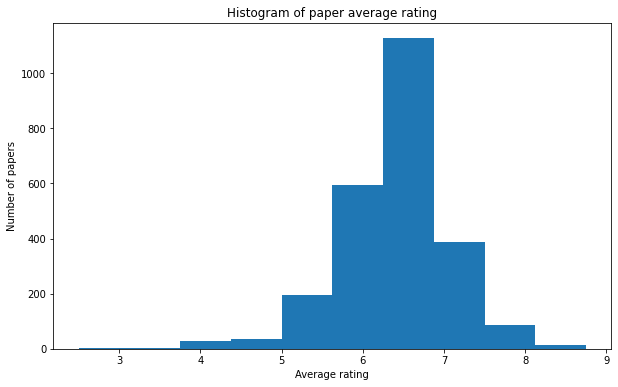

In [8]:
plt.figure(figsize=(10,6))
plt.hist(average_ratings)
plt.xlabel('Average rating')
plt.ylabel('Number of papers')
plt.title('Histogram of paper average rating')

# Pandas DF analysis

In [9]:
rating_list = []
keyword_list = []
venue_list = []


for paper_name in paper_by_name_dict:
    paper = paper_by_name_dict[paper_name]
    
    
    ratings = []
    for rating in paper['rating_list']:
        ratings.append(float(rating.split(':')[0]))
        
    if len(ratings) == 0:
        continue
        
        
    for keyword in paper['keywords']:
        keyword_list.append(keyword.lower())
        venue_list.append(paper['venue'])
        rating_list.append(np.mean(ratings))
    


In [10]:

paper_df = pd.DataFrame({'keyword': keyword_list,
                         'venue': venue_list,
                         'rating': rating_list})

Text(0, 0.5, 'Average Rating')

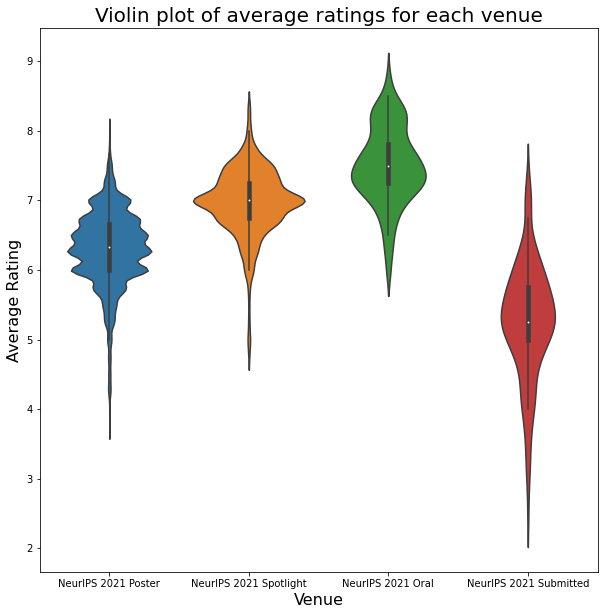

In [17]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="venue", y="rating", data=paper_df)
plt.title('Violin plot of average ratings for each venue', fontsize=20)
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)

C:\Users\Chris\AppData\Local\Temp/ipykernel_12824/918652247.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_keyword_papers_df = paper_df.groupby('keyword').mean().sort_values(by='rating', ascending=False)[keyword_count_filter]


# UCB for single keyword

In [107]:
c = 0.5

In [108]:
size_df = paper_df.groupby('keyword').size()
size_df = size_df.rename('size')

In [109]:
mean_df = paper_df.groupby('keyword').mean()

In [110]:
processed_df = pd.concat([size_df,mean_df],axis=1).reset_index(level=0)


In [111]:
def compute_UCB(x):
    return x.rating + c*np.sqrt(1/x.size)

processed_df['ucb_score'] = processed_df.apply(compute_UCB,axis=1)

In [118]:
threshold_n = 0
filtered_df = processed_df[processed_df['size'] > threshold_n]

filtered_df.nlargest(10,'ucb_score')

,keyword,size,rating,ucb_score
662,coarse correlated equilibrium,1,8.750000,9.038675
3579,optimistic hedge,1,8.750000,9.038675
1799,generalized linear model,1,8.500000,8.788675
3316,neural volume rendering,1,8.500000,8.788675
4065,random matrix theory.,1,8.500000,8.788675
754,computational statistics,1,8.333333,8.622008
186,aliasing,1,8.250000,8.538675
964,cross-modal matching,1,8.250000,8.538675
2733,low-rank matrix estimation,1,8.250000,8.538675
2927,mismatching,1,8.250000,8.538675


In [119]:
filtered_df.nsmallest(10,'ucb_score')

,keyword,size,rating,ucb_score
2272,infrastructure,1,2.500000,2.788675
334,average,1,3.000000,3.288675
1845,glue,1,3.000000,3.288675
3343,nlp benchmarks,1,3.000000,3.288675
341,back propagation,1,3.333333,3.622008
684,color correction,1,3.333333,3.622008
685,color universal design,1,3.333333,3.622008
686,color weakness,1,3.333333,3.622008
2162,image enhancement,1,3.333333,3.622008
4406,self organizing map,1,3.333333,3.622008


### Plot distribution of ratings for single keywords

C:\Users\Chris\AppData\Local\Temp/ipykernel_12824/1431389536.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_keyword_papers_df = paper_df.groupby('keyword').mean().sort_values(by='rating', ascending=False)[keyword_count_filter]


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'implicit neural representations'),
  Text(1, 0, 'annealed importance sampling'),
  Text(2, 0, 'differentiable'),
  Text(3, 0, 'missing values'),
  Text(4, 0, 'spectral analysis'),
  Text(5, 0, 'signal processing'),
  Text(6, 0, 'optimization theory'),
  Text(7, 0, 'list-decodable learning'),
  Text(8, 0, 'no-regret learning'),
  Text(9, 0, 'treatment effect')])

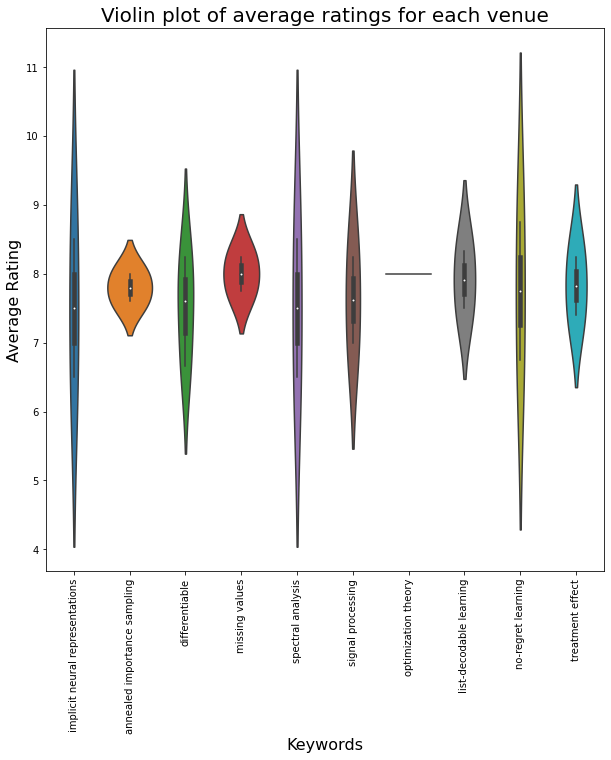

In [58]:
plt.figure(figsize=(10,10))

number_to_plot = 10
min_size = 1

keyword_count_filter = paper_df.groupby('keyword').size() > min_size
filtered_keyword_papers_df = paper_df.groupby('keyword').mean().sort_values(by='rating', ascending=False)[keyword_count_filter]
filter_index = list(filtered_keyword_papers_df.index)


filtered_data = paper_df[(paper_df['keyword'].isin(filter_index[:number_to_plot]) )]
ax = sns.violinplot(x="keyword", y="rating", data=filtered_data)
plt.title('Violin plot of average ratings for each venue', fontsize=20)
plt.xlabel('Keywords', fontsize=16)
plt.ylabel('Average Rating', fontsize=16)
plt.xticks(rotation=90)

In [40]:
filtered_keyword_papers_df

,rating
keyword,
infrastructure,2.500000
average,3.000000
glue,3.000000
nlp benchmarks,3.000000
self organizing map,3.333333
...,...
generalized linear model,8.500000
random matrix theory.,8.500000
neural volume rendering,8.500000


In [25]:
paper_df.groupby('keyword')

paper_df.groupby('keyword').mean().sort_values(by='rating')

,rating
keyword,
infrastructure,2.500000
average,3.000000
glue,3.000000
nlp benchmarks,3.000000
self organizing map,3.333333
...,...
generalized linear model,8.500000
random matrix theory.,8.500000
neural volume rendering,8.500000


In [18]:
paper_df

,keyword,venue,rating
0,convex optimization,NeurIPS 2021 Poster,5.750000
1,saddle point problem,NeurIPS 2021 Poster,5.750000
2,distributed optimization,NeurIPS 2021 Poster,5.750000
3,data similarity,NeurIPS 2021 Poster,5.750000
4,normalization,NeurIPS 2021 Spotlight,7.333333
...,...,...,...
10296,reinforcement learning,NeurIPS 2021 Submitted,4.333333
10297,bayesian deep learning,NeurIPS 2021 Submitted,4.333333
10298,tractable inference,NeurIPS 2021 Submitted,4.333333
10299,analytical inference,NeurIPS 2021 Submitted,4.333333


In [11]:
paper_df

,keyword,venue,rating
0,convex optimization,NeurIPS 2021 Poster,5.750000
1,saddle point problem,NeurIPS 2021 Poster,5.750000
2,distributed optimization,NeurIPS 2021 Poster,5.750000
3,data similarity,NeurIPS 2021 Poster,5.750000
4,normalization,NeurIPS 2021 Spotlight,7.333333
...,...,...,...
10296,reinforcement learning,NeurIPS 2021 Submitted,4.333333
10297,bayesian deep learning,NeurIPS 2021 Submitted,4.333333
10298,tractable inference,NeurIPS 2021 Submitted,4.333333
10299,analytical inference,NeurIPS 2021 Submitted,4.333333
